### Задание (Диплом)

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

### Признаки:

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

### Требуется выполнить следующее задание:

1.Загрузите файл HR.csv в pandas dataframe (5)

2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). (10)

3.Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.(10)

4.Рассчитайте сколько сотрудников работает в каждомдепартаменте.(5)

5.Показать распределение сотрудников по зарплатам. (5)

6.Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности (5)

7.Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом(10)

8.Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): (10)

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

9.Разделить данные на тестовую и обучающую выборки

-Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

-Оценить качество модели на тестовой выборки (20)

10.Загрузить jupyter notebook с решение на github и прислать ссылку (5)



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.Загрузите файл HR.csv в pandas dataframe (5)

In [3]:
df = pd.read_csv('C:\\Users\\Ryzen\\Desktop\\DataSet\\Data Analyst\\20_Diplom\\HR.csv', sep = ",")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# 2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). (10)

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [8]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.(10)

In [10]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Heatmap Correlation')

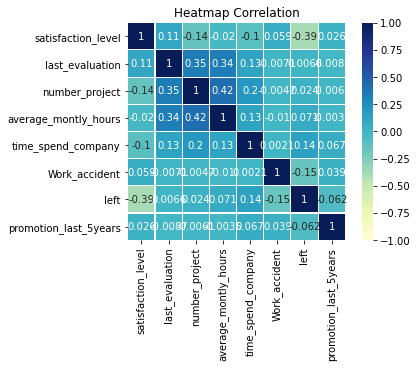

In [11]:
ax = sns.heatmap(df.corr(), annot = True, cmap ="YlGnBu", linewidth=0.1, linecolor='w', square=True, vmin=-1, vmax=1, center= 0)
ax.set_title('Heatmap Correlation')

Вывод.
1. две самые скоррелированные переменные:
number_project/average_montly_hours = 0.42
number_project/last_evaluation = 0.35

2. две наименее скоррелированные переменные:
time_spend_company/Work_accident = 0.0021
average_montly_hours/promotion_last_5years = 0.0035

In [12]:
# 4.Рассчитайте сколько сотрудников работает в каждом департаменте.(5)

In [13]:
df['left'].unique()

array([1, 0], dtype=int64)

In [14]:
# Датафрейм с действующими сотрудниками
df_left_0 = df.loc[df['left'] == 0]
df_left_0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [15]:
df_left_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 2000 to 14210
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11428 non-null  float64
 1   last_evaluation        11428 non-null  float64
 2   number_project         11428 non-null  int64  
 3   average_montly_hours   11428 non-null  int64  
 4   time_spend_company     11428 non-null  int64  
 5   Work_accident          11428 non-null  int64  
 6   left                   11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   department             11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 982.1+ KB


In [16]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [17]:
# Вариант 1: Счётчики через цикл и условие

sales_count=accounting_count=hr_count=technical_count=support_count=management_count=IT_count=product_mng_count=marketing_count=RandD_count=0
for item in df_left_0['department']:
    
    if item == 'sales':
        sales_count += 1
    
    if item == 'accounting':
        accounting_count += 1
    
    if item == 'hr':
        hr_count += 1
        
    if item == 'technical':
        technical_count += 1
    
    if item == 'support':
        support_count += 1
    
    if item == 'management':
        management_count += 1
    
    if item == 'IT':
        IT_count += 1
    
    if item == 'product_mng':
        product_mng_count += 1
    
    if item == 'marketing':
        marketing_count += 1
    
    if item == 'RandD':
        RandD_count += 1
        
print('количество сотрудников в отделах')
print('sales:', sales_count)
print('accounting:', accounting_count)
print('hr:', hr_count)
print('technical:', technical_count)
print('support:', support_count)
print('management:', management_count)
print('IT:', IT_count)
print('product_mng:', product_mng_count)
print('marketing:', marketing_count)
print('RandD:', RandD_count)
print('Всего:', sales_count+accounting_count+hr_count+technical_count+support_count+management_count+IT_count+product_mng_count+marketing_count+RandD_count)


количество сотрудников в отделах
sales: 3126
accounting: 563
hr: 524
technical: 2023
support: 1674
management: 539
IT: 954
product_mng: 704
marketing: 655
RandD: 666
Всего: 11428


In [18]:
# Вариант 2: Через группировку объектов
sales_count = df_left_0.loc[df_left_0.department == 'sales', 'department'].count()
accounting_count = df_left_0.loc[df_left_0.department == 'accounting', 'department'].count()
hr_count = df_left_0.loc[df_left_0.department == 'hr', 'department'].count()
technical_count = df_left_0.loc[df_left_0.department == 'technical', 'department'].count()
support_count = df_left_0.loc[df_left_0.department == 'support', 'department'].count()
management_count = df_left_0.loc[df_left_0.department == 'management', 'department'].count()
IT_count = df_left_0.loc[df_left_0.department == 'IT', 'department'].count()
product_mng_count = df_left_0.loc[df_left_0.department == 'product_mng', 'department'].count()
marketing_count = df_left_0.loc[df_left_0.department == 'marketing', 'department'].count()
RandD_count = df_left_0.loc[df_left_0.department == 'RandD', 'department'].count()
all_count = df_left_0.department.count()

print('количество сотрудников в отделах')
print('sales:', sales_count)
print('accounting:', accounting_count)
print('hr:', hr_count)
print('technical:', technical_count)
print('support:', support_count)
print('management:', management_count)
print('IT:', IT_count)
print('product_mng:', product_mng_count)
print('marketing:', marketing_count)
print('RandD:', RandD_count)
print('Всего:', all_count)


количество сотрудников в отделах
sales: 3126
accounting: 563
hr: 524
technical: 2023
support: 1674
management: 539
IT: 954
product_mng: 704
marketing: 655
RandD: 666
Всего: 11428


In [19]:
# Вариант 3: 
group_department = df_left_0.groupby(['department'])
group_department.department.count()

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: department, dtype: int64

In [20]:
group_salary = df_left_0.groupby(['salary', 'department'])
group_salary.department.count()

salary  department 
high    IT               79
        RandD            47
        accounting       69
        hr               39
        management      224
        marketing        71
        product_mng      62
        sales           255
        support         133
        technical       176
low     IT              437
        RandD           309
        accounting      259
        hr              243
        management      121
        marketing       276
        product_mng     346
        sales          1402
        support         757
        technical       994
medium  IT              438
        RandD           310
        accounting      235
        hr              242
        management      194
        marketing       308
        product_mng     296
        sales          1469
        support         784
        technical       853
Name: department, dtype: int64

In [21]:
# 5.Показать распределение сотрудников по зарплатам. (5)

In [22]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [23]:
g = df_left_0.groupby(['salary'])
print(g)

In [24]:
g.department.count()

salary
high      1155
low       5144
medium    5129
Name: department, dtype: int64

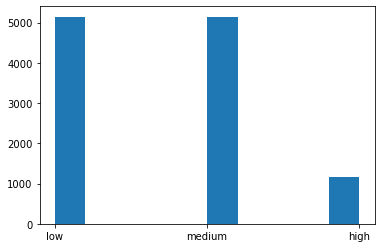

In [25]:
fig, ax = plt.subplots()
ax.hist(df_left_0['salary'])
plt.show()

In [26]:
# 6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (5)

In [27]:
g = df_left_0.groupby(['department','salary'])
print(g)

In [28]:
g.department.count()

department   salary
IT           high        79
             low        437
             medium     438
RandD        high        47
             low        309
             medium     310
accounting   high        69
             low        259
             medium     235
hr           high        39
             low        243
             medium     242
management   high       224
             low        121
             medium     194
marketing    high        71
             low        276
             medium     308
product_mng  high        62
             low        346
             medium     296
sales        high       255
             low       1402
             medium    1469
support      high       133
             low        757
             medium     784
technical    high       176
             low        994
             medium     853
Name: department, dtype: int64

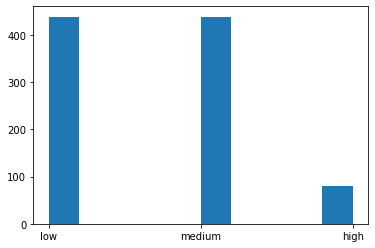

In [29]:
fig, ax = plt.subplots()
ax.hist(df_left_0.loc[df_left_0.department == 'IT', 'salary'])
plt.show()

In [30]:
g1 = df_left_0.groupby(['department'])
g1.department.count()

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: department, dtype: int64

In [31]:
pivot = df_left_0.pivot_table(
    index='department',
    columns='salary',
    values='left',
    aggfunc='count')
pivot

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


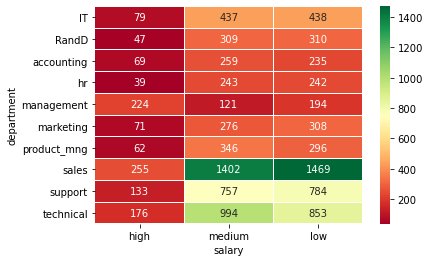

In [32]:
xaxislabels = ['high','medium','low']
sns.heatmap(pivot, xticklabels=xaxislabels, annot = True, fmt=".0f", cmap ="RdYlGn", linewidth=0.1, linecolor='w')

In [33]:
# 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом(10)

In [34]:
# Н0: сотрудники с высоким окладом проводят на работе больше времени
# H1: сотрудники с низким окладом проводят на работе больше времени

In [35]:
df_left_0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [36]:
# Количество сотрудников с высокой зарплатой
salary_high_count = df_left_0.loc[df_left_0.salary == 'high', 'average_montly_hours'].count()
salary_high_count

1155

In [37]:
# Общее время работы сотрудников с высокой зарплатой, час
salary_high_sum = df_left_0.loc[df_left_0.salary == 'high', 'average_montly_hours'].sum()
salary_high_sum

231402

In [38]:
# средняя ежемесячная выработка  на одного сотрудника с высокой зарплатой, час
production_high = salary_high_sum/salary_high_count
production_high

200.34805194805196

In [39]:
# Количество сотрудников с низкой зарплатой
salary_low_count = df_left_0.loc[df_left_0.salary == 'low', 'average_montly_hours'].count()
salary_low_count

5144

In [40]:
# Общее время работы сотрудников с низкой зарплатой, час
salary_low_sum = df_left_0.loc[df_left_0.salary == 'low', 'average_montly_hours'].sum()
salary_low_sum

1021688

In [41]:
# средняя ежемесячная выработка  на одного сотрудника с низкой зарплатой, час
production_low = salary_low_sum/salary_low_count
production_low

198.61741835147745

In [42]:
if production_high > production_low:
    print('сотрудники с высоким окладом проводят на работе больше времени:')
    print('в среднем ежемесячно на', round(production_high - production_low, 2), 'часа(ов) больше, чем сотрудники с низким окладом')
else:
    print('сотрудники с низким окладом проводят на работе больше времени:')
    print('в среднем ежемесячно на', round(production_low - production_high, 2), 'часа(ов) больше, чем сотрудники с высоким окладом')

сотрудники с высоким окладом проводят на работе больше времени:
в среднем ежемесячно на 1.73 часа(ов) больше, чем сотрудники с низким окладом


In [43]:
# 8.Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): (10)

# 8.1. Доля сотрудников с повышением за последние 5 лет

# 8.2. Средняя степень удовлетворенности

# 8.3. Среднее количество проектов

In [44]:
# 8.1. Доля сотрудников с повышением за последние 5 лет:
# Датафрейм с уволившимися сотрудниками
df_left_1 = df.loc[df['left'] == 1]
df_left_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [45]:
# Количество сотрудников среди уволившихся без повышения за последние 5 лет: 
df_left_1_promotion_last_5years_0 = df_left_1.loc[df_left_1['promotion_last_5years'] == 0].count()
df_left_1_promotion_last_5years_0.promotion_last_5years

3552

In [46]:
# Количество сотрудников среди уволившихся с повышением за последние 5 лет: 
df_left_1_promotion_last_5years_1 = df_left_1.loc[df_left_1['promotion_last_5years'] == 1].count()
df_left_1_promotion_last_5years_1.promotion_last_5years

19

In [47]:
# Доля сотрудников среди уволившихся с повышением за последние 5 лет, %:
percentage_left_1_promotion_last_5years_1 = round((df_left_1_promotion_last_5years_1.promotion_last_5years/df_left_1_promotion_last_5years_0.promotion_last_5years)*100, 2)
percentage_left_1_promotion_last_5years_1

0.53

In [48]:
# Датафрейм с неуволившимися сотрудниками
df_left_0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [49]:
# Количество сотрудников среди неуволившихся без повышения за последние 5 лет: 
df_left_0_promotion_last_5years_0 = df_left_0.loc[df_left_0['promotion_last_5years'] == 0].count()
df_left_0_promotion_last_5years_0.promotion_last_5years

11128

In [50]:
# Количество сотрудников среди неуволившихся с повышением за последние 5 лет: 
df_left_0_promotion_last_5years_1 = df_left_0.loc[df_left_0['promotion_last_5years'] == 1].count()
df_left_0_promotion_last_5years_1.promotion_last_5years

300

In [51]:
# Доля сотрудников среди неуволившихся с повышением за последние 5 лет, %:
percentage_left_0_promotion_last_5years_1 = round((df_left_0_promotion_last_5years_1.promotion_last_5years/df_left_0_promotion_last_5years_0.promotion_last_5years)*100, 2)
percentage_left_0_promotion_last_5years_1

2.7

In [52]:
if percentage_left_0_promotion_last_5years_1 > percentage_left_1_promotion_last_5years_1:
    print('Доля сотрудников среди неуволившихся с повышением за последние 5 лет =', percentage_left_0_promotion_last_5years_1, '%')
    print('выше, чем доля сотрудников среди уволившихся с повышением за последние 5 лет =', percentage_left_1_promotion_last_5years_1, '%')
else:
    print('Доля сотрудников среди уволившихся с повышением за последние 5 лет =', percentage_left_1_promotion_last_5years_1, '%')
    print('выше, чем доля сотрудников среди неуволившихся с повышением за последние 5 лет =', percentage_left_0_promotion_last_5years_1, '%')


Доля сотрудников среди неуволившихся с повышением за последние 5 лет = 2.7 %
выше, чем доля сотрудников среди уволившихся с повышением за последние 5 лет = 0.53 %


In [53]:
# 8.2. Средняя степень удовлетворенности

In [54]:
# Средняя степень удовлетворенности среди неуволившихся сотрудников
satisfaction_level_left_0 = round(df_left_0['satisfaction_level'].mean(), 2)
satisfaction_level_left_0

0.67

In [55]:
# Средняя степень удовлетворенности среди уволившихся сотрудников
satisfaction_level_left_1 = round(df_left_1['satisfaction_level'].mean(), 2)
satisfaction_level_left_1

0.44

In [56]:
if satisfaction_level_left_0 > satisfaction_level_left_1:
    print('Средняя степень удовлетворенности среди неуволившихся сотрудников =', satisfaction_level_left_0)
    print('выше, чем средняя степень удовлетворенности среди уволившихся сотрудников =', satisfaction_level_left_1)
else:
    print('Средняя степень удовлетворенности среди уволившихся сотрудников =', satisfaction_level_left_1)
    print('выше, чем Средняя степень удовлетворенности среди неуволившихся сотрудников =', satisfaction_level_left_0)


Средняя степень удовлетворенности среди неуволившихся сотрудников = 0.67
выше, чем средняя степень удовлетворенности среди уволившихся сотрудников = 0.44


In [57]:
# 8.3. Среднее количество проектов
# number_project - Количество проектов, выполненных за время работы

In [58]:
# Среднее количество проектов, выполненных за время работы среди неуволившихся сотрудников
number_project_left_0 = round(df_left_0['number_project'].mean(), 2)
number_project_left_0

3.79

In [59]:
# Среднее количество проектов, выполненных за время работы среди уволившихся сотрудников
number_project_left_1 = round(df_left_1['number_project'].mean(), 2)
number_project_left_1

3.86

In [60]:
if number_project_left_0 > number_project_left_1:
    print('Среднее количество проектов, выполненных за время работы среди неуволившихся сотрудников =', number_project_left_0)
    print('выше, чем среднее количество проектов, выполненных за время работы среди уволившихся сотрудников =', number_project_left_1)
    print('соответственно доля проектов, выполненных за время работы среди неуволившихся сотрудников превышает на ', 
          round((number_project_left_0 - number_project_left_1)*100/number_project_left_0, 2), '%')
else:
    print('Среднее количество проектов, выполненных за время работы среди уволившихся сотрудников =', number_project_left_1)
    print('выше, чем среднее количество проектов, выполненных за время работы среди неуволившихся сотрудников =', number_project_left_0)
    print('соответственно доля проектов, выполненных за время работы среди уволившихся сотрудников превышает на ', 
          round((number_project_left_1 - number_project_left_0)*100/number_project_left_1, 2), '%')

Среднее количество проектов, выполненных за время работы среди уволившихся сотрудников = 3.86
выше, чем среднее количество проектов, выполненных за время работы среди неуволившихся сотрудников = 3.79
соответственно доля проектов, выполненных за время работы среди уволившихся сотрудников превышает на  1.81 %


In [61]:
# 9.Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки (20)

In [62]:
df_without_department_and_salary = df.drop(['department', 'salary'], axis = 1)
df_without_department_and_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [63]:
df_without_department_and_salary.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [82]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [83]:
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [92]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_without_department_and_salary, 
    df_without_department_and_salary.left, test_size=0.25)

In [93]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [94]:
lda = LinearDiscriminantAnalysis()

In [95]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [96]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
# смотрим разницу факта и прогноза
# left - факт, Unnamed 0 - прогноз
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
14645,1.0,NaN
4018,0.0,NaN
4310,0.0,NaN
5836,0.0,NaN
5485,0.0,NaN
...,...,...
8397,0.0,NaN
11745,0.0,NaN
6897,0.0,NaN
6907,0.0,NaN


In [99]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test, lda.predict(X_test))

0.7608

In [101]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.4305851 ,  0.53586297, -0.23407034,  0.00450065,  0.23114024,
        -1.01823977,  0.        , -1.12774812]])

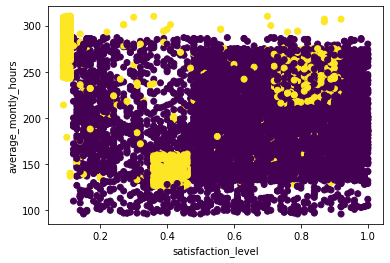

In [102]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['satisfaction_level'], X_train['average_montly_hours'], c=y_train)
plt.title('')
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.show()

In [ ]:
# 10.Загрузить jupyter notebook с решение на github и прислать ссылку (5)